<a href="https://colab.research.google.com/github/tortotubus/JupyterNotebooks/blob/main/Double_Slit_Intensity_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>The following script implements the following equation to show an relative, angular intensity plot that considers diffraction from both individual slits, as well as diffration between two slits:</p>

<ol>
<li>$$\alpha = \frac{\pi a\sin{\theta}}{\lambda}$$</li>
<li>$$\beta = \frac{\pi d\sin{\theta}}{\lambda}$$</li>
<li>$$I=I_0\:cos^2(\beta)\left(\frac{\sin{\alpha}}{\alpha}\right)^2$$</li>
<li>$$I=I_0\:cos^2\left(\frac{\pi d\sin{\theta}}{\lambda}\right)\left(\frac{\sin{\frac{\pi a\sin{\theta}}{\lambda}}}{\frac{\pi a\sin{\theta}}{\lambda}}\right)^2$$</li>
</ol>

Further, the script will also automatically color the plot to match the wavelength of light used. This function may also be interactively be shown using [Desmos](https://www.desmos.com/calculator/e4mkuvkyiq).

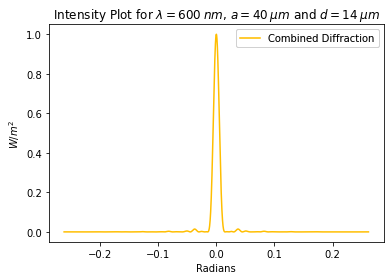

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

degreetoradians = 0.0174533
maxtheta = 15*degreetoradians
dtheta = 1e-2*degreetoradians
theta = np.arange(-maxtheta, maxtheta, dtheta)

# 380 nm through 750
I0 = 1
l = 600e-9
d = 24*l
a = 67*l

light_color = wavelength_to_rgb(l*1e9)
light_color = ((light_color[0]/255,light_color[1]/255,light_color[2]/255))

#alpha = (np.pi*d*np.sin(theta))/l
#beta = (np.pi*a*np.sin(theta))/l
#singleslit=np.power(np.cos(beta), 2)
#doubleslit=np.power(np.sin(alpha)/alpha, 2)
#I=singleslit*doubleslit

sI = I0*np.power((np.cos((np.pi*d*np.sin(theta))/l)), 2)
dI = I0*np.power(np.sin((np.pi*a*np.sin(theta))/l)/((np.pi*a*np.sin(theta))/l), 2)
I = I0*np.power((np.cos((np.pi*d*np.sin(theta))/l)), 2)*np.power(np.sin((np.pi*a*np.sin(theta))/l)/((np.pi*a*np.sin(theta))/l), 2)

showSingleSlitIntensity = False
showDoubleSlitIntensity = False
showCombinedIntensity = True

if showCombinedIntensity:
  intensity, = plt.plot(theta, I, color=light_color, label="Combined Diffraction")
  intensity_legend = plt.legend(handles=[intensity], loc='upper right')
  plt.gca().add_artist(intensity_legend)

if showDoubleSlitIntensity:
  doubleintensity, = plt.plot(theta, dI, color='blue', label='Double Slit Interference', linestyle='--')
  doubleintensity_legend = plt.legend(handles=[doubleintensity], loc='upper left')
  plt.gca().add_artist(doubleintensity_legend)

if showSingleSlitIntensity:
  singleintensity, = plt.plot(theta, sI, color='orange', label='Single Slit Diffraction', linestyle='--')
  singleintensity_legend = plt.legend(handles=[singleintensity], loc='lower left')
  plt.gca().add_artist(singleintensity_legend)

plt.xlabel("Radians")
plt.ylabel("$W/m^2$")
plt.title("Intensity Plot for $\lambda=" + str(int(l*1e9)) + "\: nm$, $a=" + str(round(a*1e6)) + "\:\mu m$ and $d=" + str(round(d*1e6)) + "\:\mu m$")
plt.savefig('intensityplot.png', dpi=1000)
plt.show()

<p>In addition, we can use <code>pcolormesh()</code> to generate an image for the combined diffraction:</p>

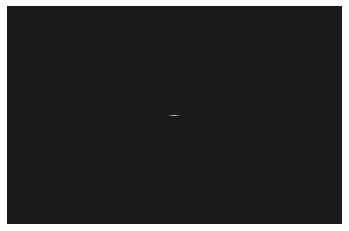

In [ ]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

theta_steps = 1e4

height = 199
middle = int(np.floor(height/2))
width = int(maxtheta*theta_steps)*2

intensity_array = np.zeros((height, width))

for theta in range(int(-maxtheta*theta_steps), int(maxtheta*theta_steps), 1):
  if theta != 0:
    index = theta - int(maxtheta*theta_steps)
    intensity_array[middle, index] = np.power((np.cos((np.pi*d*np.sin((theta/theta_steps)))/l)), 2)*np.power(np.sin((np.pi*a*np.sin((theta/theta_steps)))/l)/((np.pi*a*np.sin((theta/theta_steps)))/l), 2)
  else:
    intensity_array[middle, index] = 1

screen_color = [0.1, 0.1, 0.1]

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(screen_color[0], light_color[0], N)
vals[:, 1] = np.linspace(screen_color[1], light_color[1], N)
vals[:, 2] = np.linspace(screen_color[2], light_color[2], N)
newcmp = ListedColormap(vals)

plt.pcolormesh(intensity_array, cmap=newcmp)
plt.axis('off')
plt.savefig('intensityhist.png', dpi=1000)
plt.show()